# Importing the Libraries and Dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_absolute_error,\
mean_squared_error, r2_score

# Data Collection and Processing

In [2]:
# Loading the Diabetes data from csv file and create Pandas DataFrame
wine_data = pd.read_csv('wine_quality_dataset.csv')

In [3]:
# print 5 rows of dataset.
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# print number of rows and columns 
wine_data.shape

(1599, 12)

In [5]:
# print the information of dataset
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
# find the number of missing values in each column
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
# counting number of zeroes in each column of Diabetes dataset.
(wine_data == 0).sum()

fixed acidity             0
volatile acidity          0
citric acid             132
residual sugar            0
chlorides                 0
free sulfur dioxide       0
total sulfur dioxide      0
density                   0
pH                        0
sulphates                 0
alcohol                   0
quality                   0
dtype: int64

## Handling the zero value in Citric Acid Columns


In [8]:
wine_data['citric acid'] = wine_data[['citric acid']].replace(0,np.NaN)

In [9]:
# counting number of zeroes in each column of Diabetes dataset.
(wine_data == 0).sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
# find the number of missing values in each column
wine_data.isnull().sum()

fixed acidity             0
volatile acidity          0
citric acid             132
residual sugar            0
chlorides                 0
free sulfur dioxide       0
total sulfur dioxide      0
density                   0
pH                        0
sulphates                 0
alcohol                   0
quality                   0
dtype: int64

In [11]:
# Finding the missing values by taking Mean.
wine_data['citric acid'].fillna(wine_data['citric acid'].mean(), inplace = True)

In [12]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Performing Data Analysis

In [13]:
# Performing statistics for each column
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.295358,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.177021,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.010000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.150000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.295358,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [14]:
wine_data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [15]:
wine_data.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.259607,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.229879,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.268407,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.298823,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.387050,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


# Data Visualisation

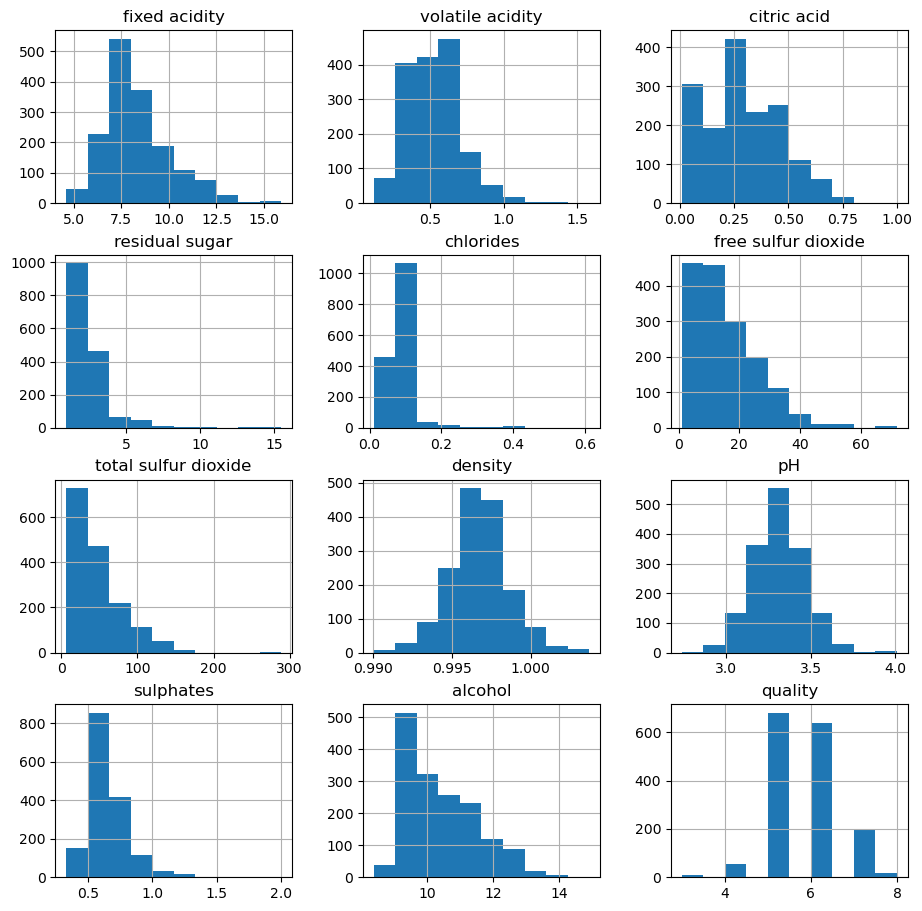

In [16]:
wine_data.hist(figsize=(11,11));

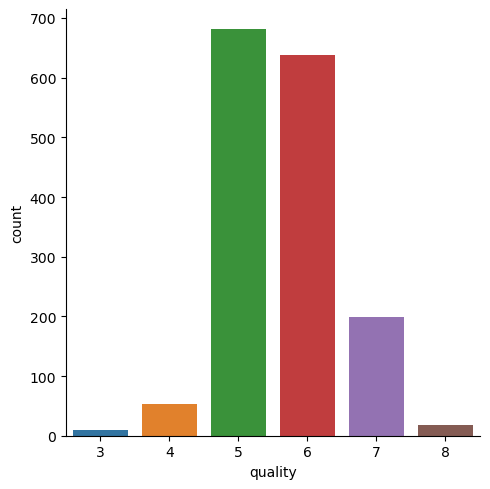

In [17]:
sb.catplot(x = 'quality', data = wine_data, kind = 'count')

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

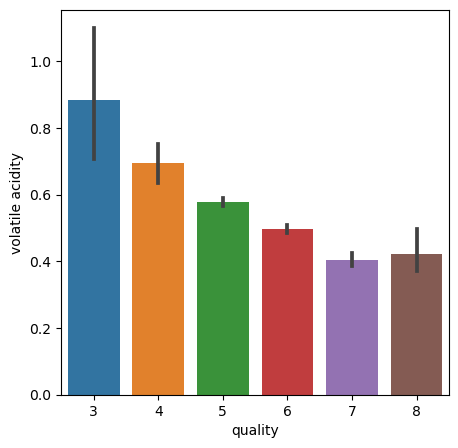

In [18]:
# volatile acidity vs quality
plot = plt.figure(figsize = (5,5))
sb.barplot(x = 'quality', y = 'volatile acidity', data = wine_data)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

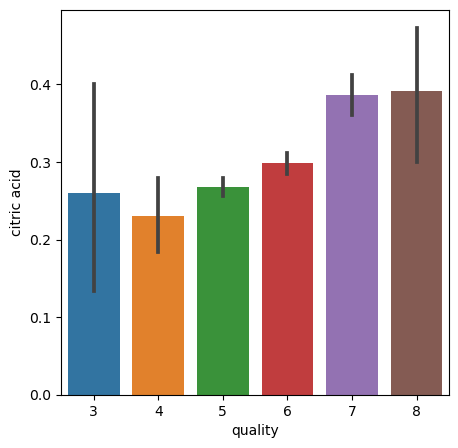

In [19]:
# citric acid vs quality
plot = plt.figure(figsize = (5,5))
sb.barplot(x = 'quality', y = 'citric acid', data = wine_data)

Text(0.5, 1.0, 'Correlation Heatmap')

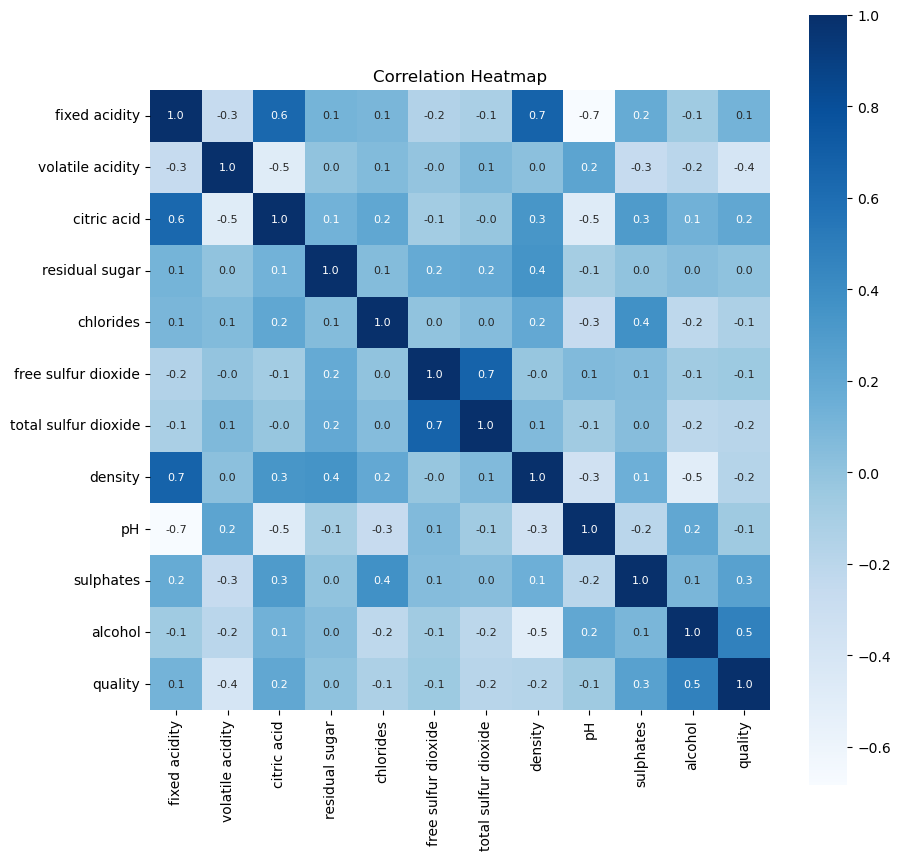

In [20]:
# For understand the correlation between the columns, we use heatmaps
plt.figure(figsize = (10,10))
sb.heatmap(wine_data.corr(), cbar = True, square = True, fmt = '.1f', annot = True, 
           annot_kws = {'size':8}, cmap = 'Blues').set_title('Correlation Heatmap')

# Separating targert Feature from Others Features

In [21]:
x = wine_data.drop(columns = ['quality'],axis = 1)

# Label Binarization 
y = wine_data['quality'].apply(lambda q_value : 1 if q_value >= 7 else 0)

In [22]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.295358,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.295358,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.040000,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.560000,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.295358,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [23]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: quality, dtype: int64

# Splitting dataset for Training and Testing

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, stratify = y, random_state = 2)

In [25]:
x.shape, x_train.shape, x_test.shape

((1599, 11), (1279, 11), (320, 11))

# Model Training

## Using Logistic Regression

In [26]:
model_1 = LogisticRegression()

In [27]:
#training the Logistic model
model_1.fit(x_train, y_train)
#training accuracy
model_1.score(x_train, y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8803752931978108

In [28]:
#predicted outcomes
model_1_pred = model_1.predict(x_test)

## Using Random Forest Classifier

In [29]:
model_2 = RandomForestClassifier()

In [30]:
#training the Random Forest Classifier
model_2.fit(x_train, y_train)
#training accuracy
model_2.score(x_train, y_train)

0.9992181391712275

In [31]:
#predicted outcomes
model_2_pred = model_2.predict(x_test)

## Using support vector machine

In [32]:
model_3 = svm.SVC(kernel = 'linear')

In [33]:
# training the support vector machine
model_3.fit(x_train, y_train)
#training accuracy
model_3.score(x_train, y_train)

0.8639562157935887

In [34]:
#predicted outcomes
model_3_pred = model_3.predict(x_test)

# Model Evaluation

## Evaluating Logistic Regression Model

### Confusion matrix

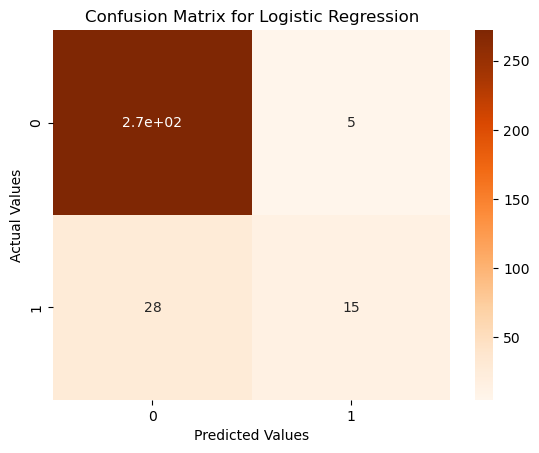

In [35]:
sb.heatmap(confusion_matrix(y_test, model_1_pred), annot=True, cmap = 'Oranges')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

### Distribution plot

C:\Users\hp\AppData\Local\Temp\ipykernel_18360\3090737024.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  actual = sb.distplot(y_test, color = 'r', label = 'Actual Value', hist = False)
C:\Users\hp\AppData\Local\Temp\ipykernel_18360\3090737024.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.d

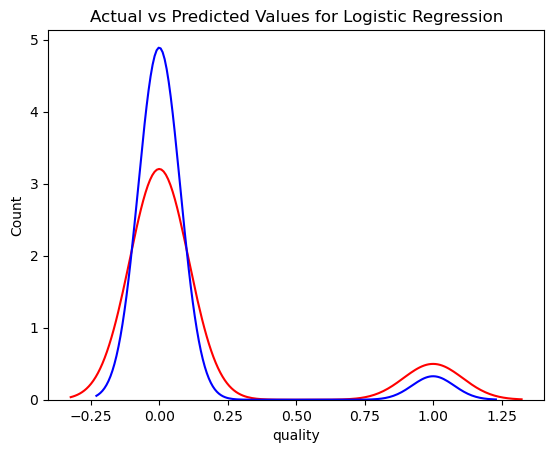

In [36]:
actual = sb.distplot(y_test, color = 'r', label = 'Actual Value', hist = False)
sb.distplot(model_1_pred, color = 'b', label = 'Predicted Value', hist = False, ax = actual)
plt.title('Actual vs Predicted Values for Logistic Regression')
plt.xlabel('quality')
plt.ylabel('Count')
plt.show()

### Classification Report

In [37]:
print(classification_report(y_test, model_1_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       277
           1       0.75      0.35      0.48        43

    accuracy                           0.90       320
   macro avg       0.83      0.67      0.71       320
weighted avg       0.89      0.90      0.88       320



In [38]:
print('Accuracy Score: ', accuracy_score(y_test, model_1_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, model_1_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, model_1_pred))
print('R2 Score: ', r2_score(y_test, model_1_pred))

Accuracy Score:  0.896875
Mean Absolute Error:  0.103125
Mean Squared Error:  0.103125
R2 Score:  0.11342456552766345


## Evaluating Random Forest Classifier

### Confusion matrix

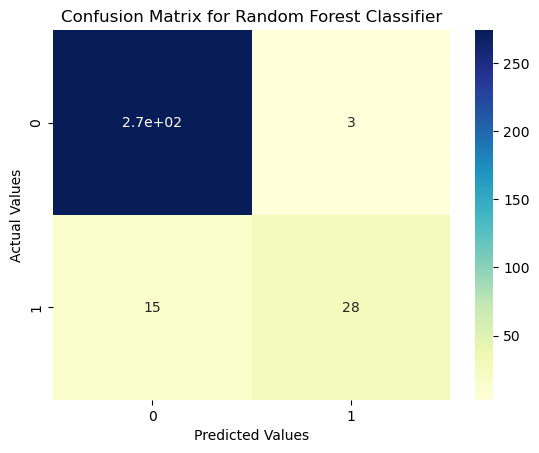

In [39]:
sb.heatmap(confusion_matrix(y_test, model_2_pred), annot=True, cmap = 'YlGnBu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

### Distribution plot

C:\Users\hp\AppData\Local\Temp\ipykernel_18360\2732082098.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  actual = sb.distplot(y_test, color = 'r', label = 'Actual Value', hist = False)
C:\Users\hp\AppData\Local\Temp\ipykernel_18360\2732082098.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.d

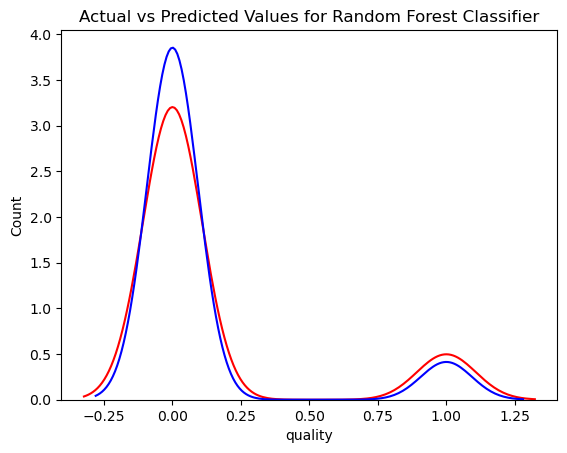

In [40]:
actual = sb.distplot(y_test, color = 'r', label = 'Actual Value', hist = False)
sb.distplot(model_2_pred, color = 'b', label = 'Predicted Value', hist = False, ax = actual)
plt.title('Actual vs Predicted Values for Random Forest Classifier')
plt.xlabel('quality')
plt.ylabel('Count')
plt.show()

### Classification Report

In [41]:
print(classification_report(y_test, model_2_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       277
           1       0.90      0.65      0.76        43

    accuracy                           0.94       320
   macro avg       0.93      0.82      0.86       320
weighted avg       0.94      0.94      0.94       320



In [42]:
print('Accuracy Score: ', accuracy_score(y_test, model_2_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, model_2_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, model_2_pred))
print('R2 Score: ', r2_score(y_test, model_2_pred))

Accuracy Score:  0.94375
Mean Absolute Error:  0.05625
Mean Squared Error:  0.05625
R2 Score:  0.5164133993787254


## Evaluating Support Vector Machine

### Confusion matrix

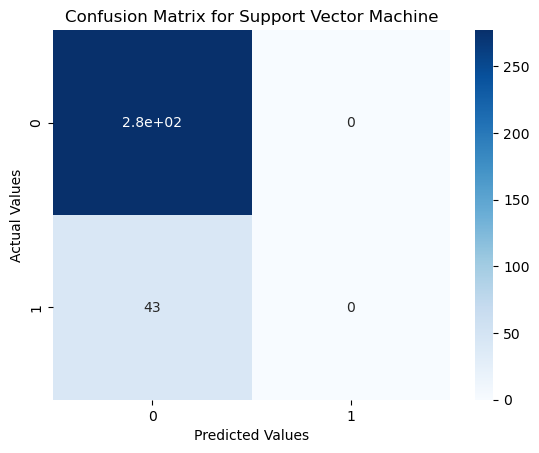

In [43]:
sb.heatmap(confusion_matrix(y_test, model_3_pred), annot=True, cmap = 'Blues')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix for Support Vector Machine')
plt.show()

### Distribution plot

C:\Users\hp\AppData\Local\Temp\ipykernel_18360\1942593133.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  actual = sb.distplot(y_test, color = 'r', label = 'Actual Value', hist = False)
C:\Users\hp\AppData\Local\Temp\ipykernel_18360\1942593133.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.d

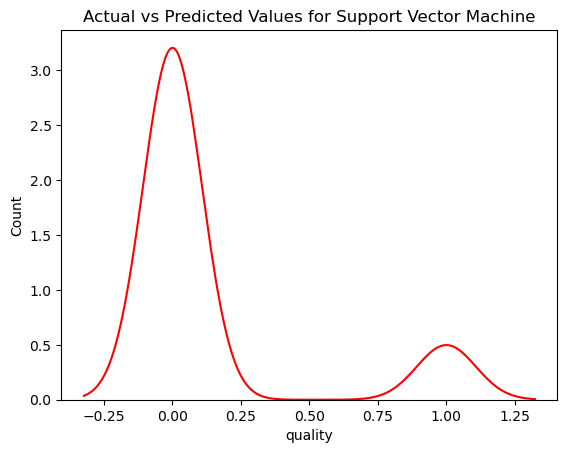

In [44]:
actual = sb.distplot(y_test, color = 'r', label = 'Actual Value', hist = False)
sb.distplot(model_3_pred, color = 'b', label = 'Predicted Value', hist = False, ax = actual)
plt.title('Actual vs Predicted Values for Support Vector Machine')
plt.xlabel('quality')
plt.ylabel('Count')
plt.show()

### Classification Report

In [45]:
print(classification_report(y_test, model_3_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       277
           1       0.00      0.00      0.00        43

    accuracy                           0.87       320
   macro avg       0.43      0.50      0.46       320
weighted avg       0.75      0.87      0.80       320



C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
print('Accuracy Score: ', accuracy_score(y_test, model_3_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, model_3_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, model_3_pred))
print('R2 Score: ', r2_score(y_test, model_3_pred))

Accuracy Score:  0.865625
Mean Absolute Error:  0.134375
Mean Squared Error:  0.134375
R2 Score:  -0.15523465703971118


# Comparing the models

Text(0.5, 1.0, 'Comparison of different models')

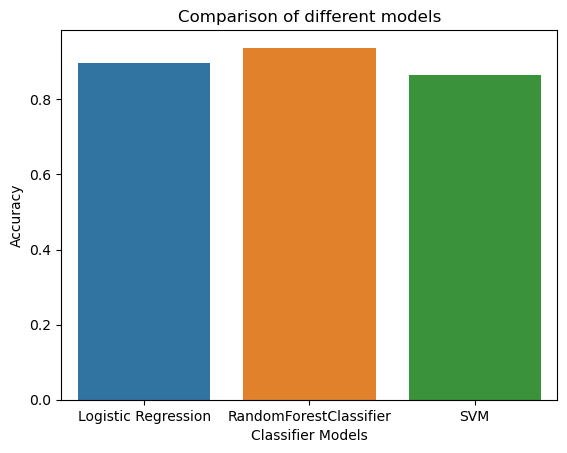

In [217]:
#comparing the accuracy of different models
sb.barplot(x = ['Logistic Regression', 'RandomForestClassifier', 'SVM'], y = [accuracy_score(y_test, model_1_pred), 
                                                                              accuracy_score(y_test, model_2_pred), 
                                                                              accuracy_score(y_test, model_3_pred)])
plt.xlabel('Classifier Models')
plt.ylabel('Accuracy')
plt.title('Comparison of different models')

Conclusion:-

From the data analysis for the classification models, We can see Logistic Regression and SVM outperformed by Random Forest Classifier with 93% accuracy. 

# Predicting the wine quality using Random Forest Model

In [218]:
model_2_prediciton = model_2.predict(x)


for prediction in model_2_prediciton:
    if prediction == 1:
        print('Good Quality Wine')
    else:
        print('Bad Quality Wine')

Bad Quality Wine
Bad Quality Wine
Bad Quality Wine
Bad Quality Wine
Bad Quality Wine
Bad Quality Wine
Bad Quality Wine
Good Quality Wine
Good Quality Wine
Bad Quality Wine
Bad Quality Wine
Bad Quality Wine
Bad Quality Wine
Bad Quality Wine
Bad Quality Wine
Bad Quality Wine
Good Quality Wine
Bad Quality Wine
Bad Quality Wine
Bad Quality Wine
Bad Quality Wine
Bad Quality Wine
Bad Quality Wine
Bad Quality Wine
Bad Quality Wine
Bad Quality Wine
Bad Quality Wine
Bad Quality Wine
Bad Quality Wine
Bad Quality Wine
Bad Quality Wine
Bad Quality Wine
Bad Quality Wine
Bad Quality Wine
Bad Quality Wine
Bad Quality Wine
Bad Quality Wine
Good Quality Wine
Bad Quality Wine
Bad Quality Wine
Bad Quality Wine
Bad Quality Wine
Bad Quality Wine
Bad Quality Wine
Bad Quality Wine
Bad Quality Wine
Bad Quality Wine
Bad Quality Wine
Bad Quality Wine
Bad Quality Wine
Bad Quality Wine
Bad Quality Wine
Bad Quality Wine
Bad Quality Wine
Bad Quality Wine
Bad Quality Wine
Bad Quality Wine
Bad Quality Wine
Bad Qualit